In [1]:
import numpy as np
from MCMC_aux import get_model
import Parameters as par
import Models as mod
import Kernels as ker
import GP_Likelihood as gp
from MCMC import run_MCMC as run
import plotting as plot
from saving import save
import auxiliary as aux
%matplotlib inline

2813.2308006313287 16620.585819951895


In [2]:
time = np.arange(0,20,1)
A = 10.
P = 5.
err = []
for i in time:
    err.append(np.random.uniform(-3,3))
rv = A*np.cos(time*((2*np.pi)/P))+err
rv_err = np.ones_like(rv)*3

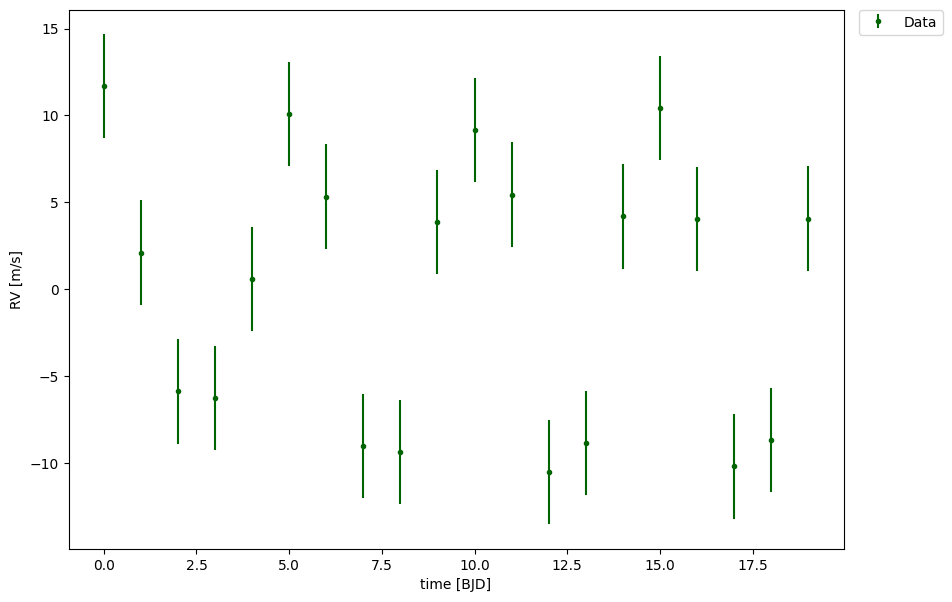

In [3]:
plot.data_plot(time, rv, y_err = rv_err)

In [4]:
iterations = 100
numb_chains = 100
hparam = par.par_create("Cosine")
hparam["gp_amp"] = par.parameter(value = 10., error = 0.5, vary = True)
hparam["gp_per"] = par.parameter(value = 5., error = 0.5, vary = True)
prior_list = []
par.PRINTPRIORDER()

Gaussian: List should take the form [mu, sigma] where all values are floats or ints 
Jeffery: List should take the form [minval, maxval] where all values are floats or ints 
Modified Jeffery: List should take the form [minval, maxval, kneeval] where all values are floats or ints 
Uniform: List should take the form [minval, maxval] where all values are floats or ints


In [5]:
pri_amp = par.pri_create("gp_amp", "Uniform", [5.,15.])
prior_list.append(pri_amp)
pri_per = par.pri_create("gp_per", "Uniform", [0.,10.])
prior_list.append(pri_per)

210


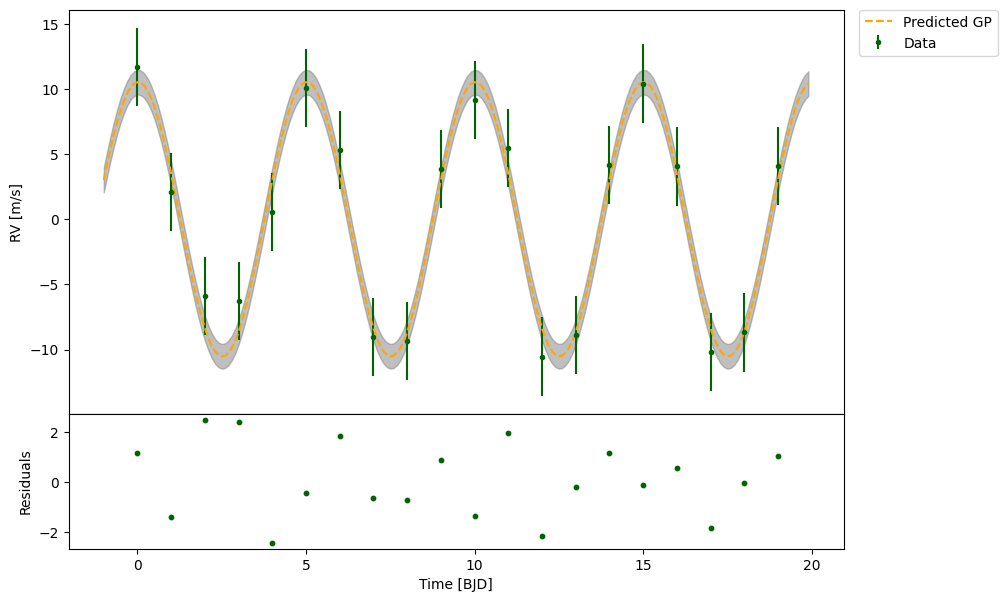

In [6]:
plot.GP_plot(time, rv, hparam, "Cosine", rv_err = rv_err, residuals = True)

In [7]:
logL_chain, fin_hparams, fin_model_param, completed_iterations = run(iterations, time, rv, rv_err, hparam, "Cosine")

Initial hyper-parameter guesses: 
[10.0, 5.0]

Initial model parameter guesses (ecc and omega are replaced by Sk and Ck): 
[0.0]

Initial Log Likelihood:  -48.00889603773489

Number of chains:  100

Start Iterations

Progress:  |██████████████████████████████████████████████████| 100.0% Complete


100 iterations have been completed with 100 contemporaneous chains

Acceptance Rate =  0.5297029702970297
 ---- 0.07047214905420938 minutes ----


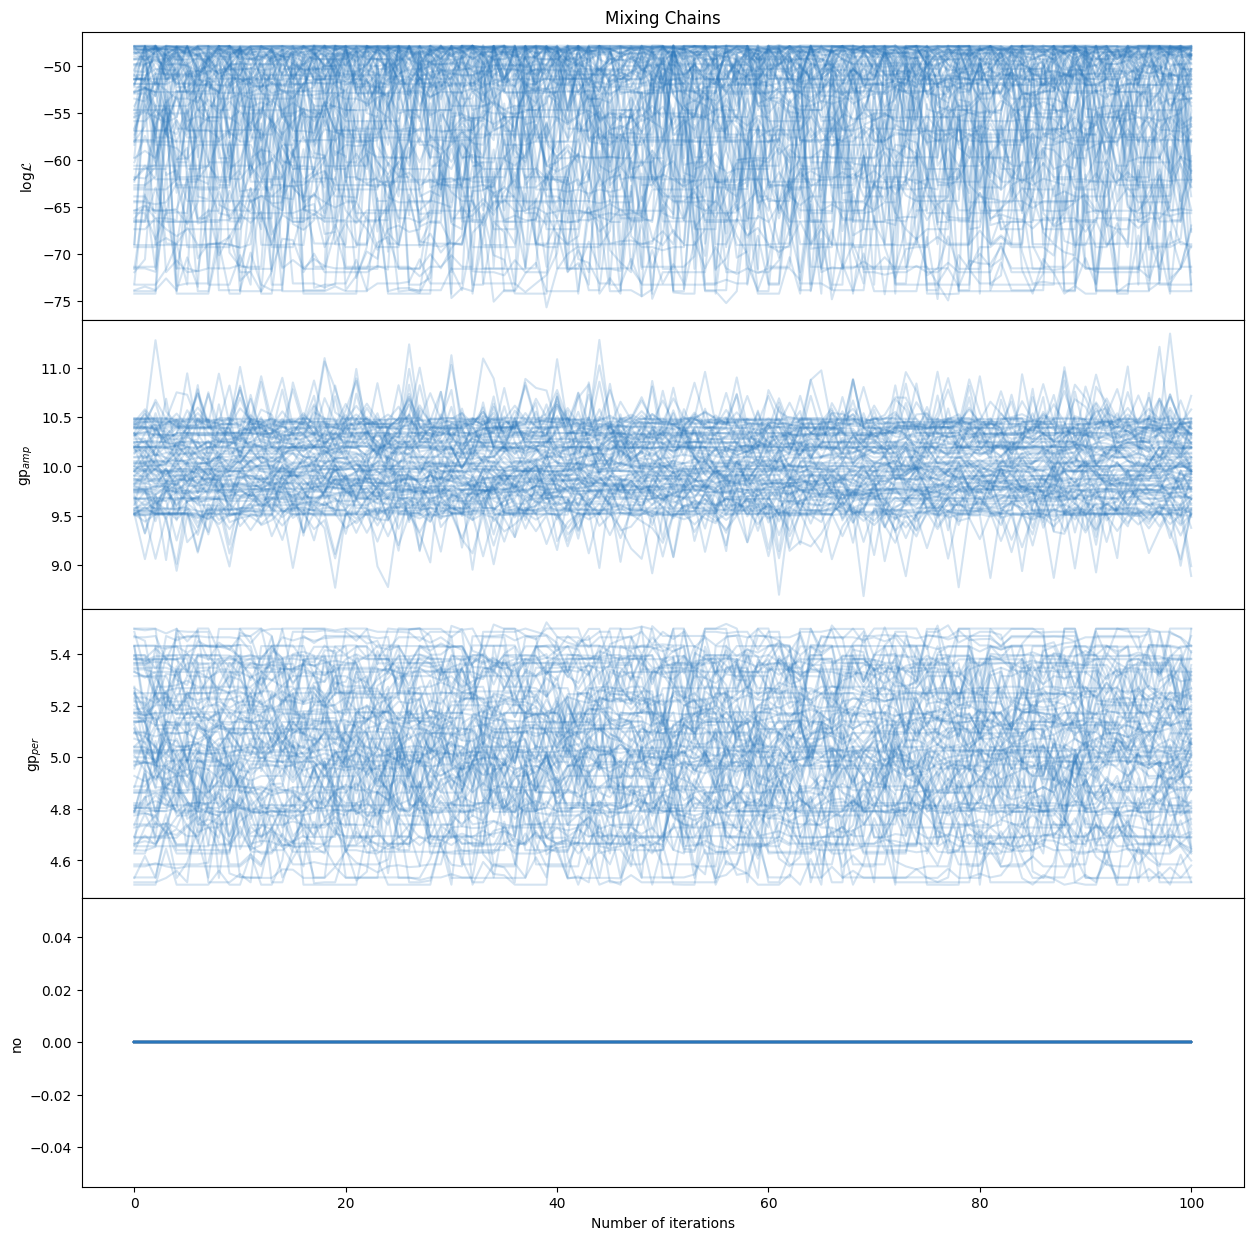

In [8]:
model_list = ['No_Model']
plot.mixing_plot(fin_hparams, "Cosine", fin_model_param, model_list, logL_chain)

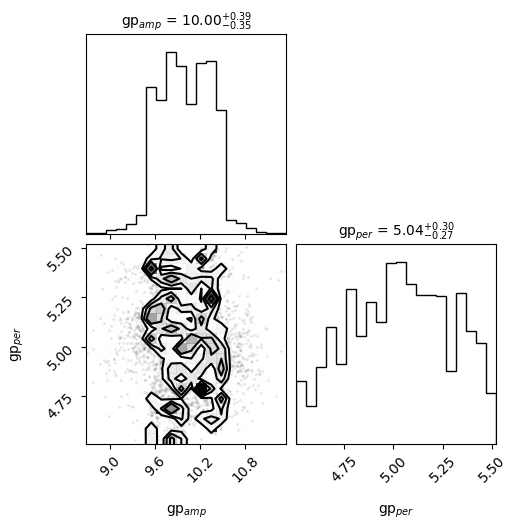

Inside: No dynamic range in model


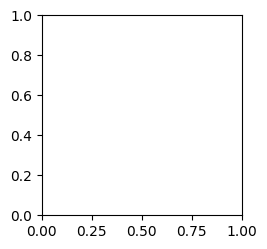

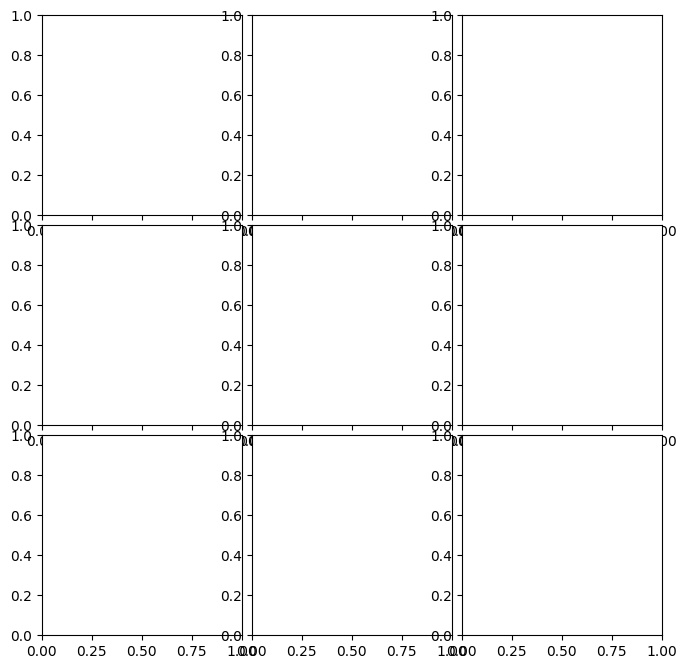

Inside: No dynamic range in model
Parameter values after MCMC:  [10.000722889538007, 5.036626707697094]


In [9]:
final_param_values, final_param_erru, final_param_errd = plot.corner_plot(fin_hparams, "Cosine", fin_model_param, model_list, errors=True)

In [24]:
def ecc_anomaly(M, ecc, max_itr=200):
    '''
    ----------
    M : float
        Mean anomaly
    ecc : float
        Eccentricity, number between 0. and 0.99
    max_itr : integer, optional
        Number of maximum iteration in E computation. The default is 200.
    Returns
    -------
    E : float
        Eccentric anomaly
    '''
    
    E0 = M
    E = M
    #print("E before = ", E)
    for i in range(max_itr):
        f = E0 - ecc*np.sin(E0) - M
        fp = 1. - ecc*np.cos(E0)
        E = E0 - f/fp
        
        # check for convergence
        if (np.linalg.norm(E - E0, ord=1) <= 1.0e-10):
            return E
            break
        # if not convergence continue
        E0 = E
    
    # no convergence, return best estimate
    #print('Best estimate E = ',E[0:5])
    return E

time1 = np.arange(0,20,1)
time2 = np.arange(0.5,20,4)
A = 10.
P = 5.
err = []
for i in time1:
    err.append(np.random.uniform(0,0))
rv1 = A*np.cos(time1*((2*np.pi)/P))
rv1_err = np.ones_like(rv1)*3
err = []
for i in time2:
    err.append(np.random.uniform(-3,3))
rv2 = A*np.cos(time2*((2*np.pi)/P))+20
rv2_err = np.ones_like(rv2)*3

In [25]:
time, rv, rv_err, flags = mod.combine_data([time1,time2], [rv1,rv2], [rv1_err,rv2_err])

In [26]:
K = 20
ecc = 0.5
omega = np.pi/2.
Pl = 3.6
t0 = time[0]
M = 2*np.pi * (time-t0) / Pl
E = ecc_anomaly(M, ecc)
nu = 2. * np.arctan(np.sqrt((1.+ecc)/(1.-ecc)) * np.tan(E/2.))
Kep = K * (np.cos(omega + nu) + ecc*np.cos(omega))
rv = rv + Kep

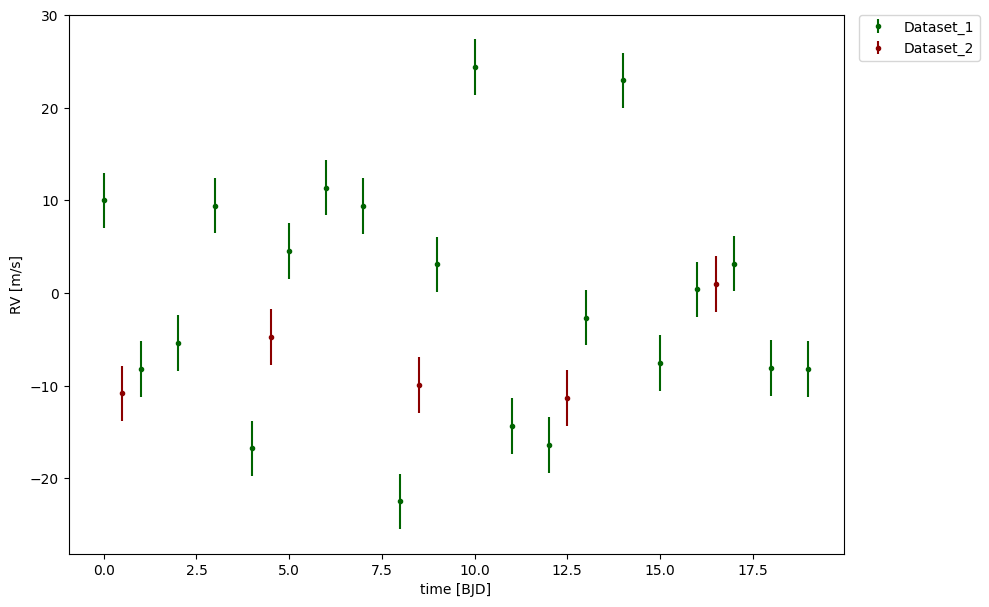

In [27]:
plot.data_plot(time, rv, y_err = rv_err, flags = flags, offsets = [20])

In [28]:
iterations = 100
numb_chains = 100
hparam = par.par_create("Cosine")
hparam["gp_amp"] = par.parameter(value = 10., error = 0.5, vary = True)
hparam["gp_per"] = par.parameter(value = 5., error = 0.5, vary = True)
prior_list = []
par.PRINTPRIORDER()

Gaussian: List should take the form [mu, sigma] where all values are floats or ints 
Jeffery: List should take the form [minval, maxval] where all values are floats or ints 
Modified Jeffery: List should take the form [minval, maxval, kneeval] where all values are floats or ints 
Uniform: List should take the form [minval, maxval] where all values are floats or ints


In [29]:
pri_amp = par.pri_create("gp_amp", "Uniform", [5.,15.])
prior_list.append(pri_amp)
pri_per = par.pri_create("gp_per", "Uniform", [0.,10.])
prior_list.append(pri_per)
model_list = ["Keplerian", "Offset"]
model_par = mod.mod_create(model_list)
print(model_par)

{'P_0': 'period', 'K_0': 'semi-amplitude', 'ecc_0': 'eccentricity', 'omega_0': 'angle of periastron', 't0_0': 't of periastron passage', 'offset_0': 'offset'}


In [30]:
model_par["P_0"]=par.parameter(value=3.6, error=0.5, vary=True)
model_par["K_0"]=par.parameter(value=20., error=1., vary=True)
model_par["ecc_0"]=par.parameter(value=0.5, error=0.1, vary=True)
model_par["omega_0"]=par.parameter(value=np.pi/2, error=0.05, vary=True)
model_par["t0_0"]=par.parameter(value=0., error=0.1, vary=True)
model_par["offset_0"] = par.parameter(20., 0.5, True)
pri_per = par.pri_create("P_0", "Uniform", [0.,5.])
prior_list.append(pri_per)
pri_per = par.pri_create("K_0", "Uniform", [10.,30.])
prior_list.append(pri_per)
pri_per = par.pri_create("ecc_0", "Uniform", [0.,1.])
prior_list.append(pri_per)
pri_per = par.pri_create("t0_0", "Uniform", [0.,5.])
prior_list.append(pri_per)
pri_per = par.pri_create("offset_0", "Uniform", [0.,30.])
prior_list.append(pri_per)
print(prior_list)
print(model_par)

[('gp_amp', 'Uniform', {'minval': 5.0, 'maxval': 15.0}), ('gp_per', 'Uniform', {'minval': 0.0, 'maxval': 10.0}), ('P_0', 'Uniform', {'minval': 0.0, 'maxval': 5.0}), ('K_0', 'Uniform', {'minval': 10.0, 'maxval': 30.0}), ('ecc_0', 'Uniform', {'minval': 0.0, 'maxval': 1.0}), ('t0_0', 'Uniform', {'minval': 0.0, 'maxval': 5.0}), ('offset_0', 'Uniform', {'minval': 0.0, 'maxval': 30.0})]
{'P_0': Parameter object: value = 3.6, error=0.5 (vary = True) 
, 'K_0': Parameter object: value = 20.0, error=1.0 (vary = True) 
, 'ecc_0': Parameter object: value = 0.5, error=0.1 (vary = True) 
, 'omega_0': Parameter object: value = 1.5707963267948966, error=0.05 (vary = True) 
, 't0_0': Parameter object: value = 0.0, error=0.1 (vary = True) 
, 'offset_0': Parameter object: value = 20.0, error=0.5 (vary = True) 
}


210


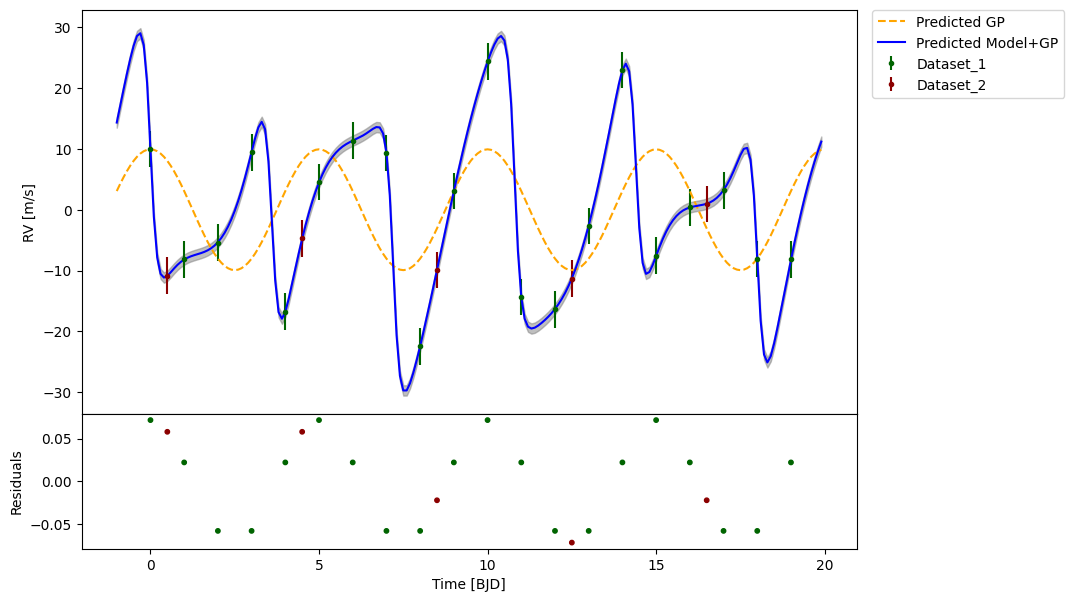

In [31]:
plot.GP_plot(time, rv, hparam, "Cosine", rv_err = rv_err, model_list = model_list, model_param = model_par, flags = flags, residuals = True)

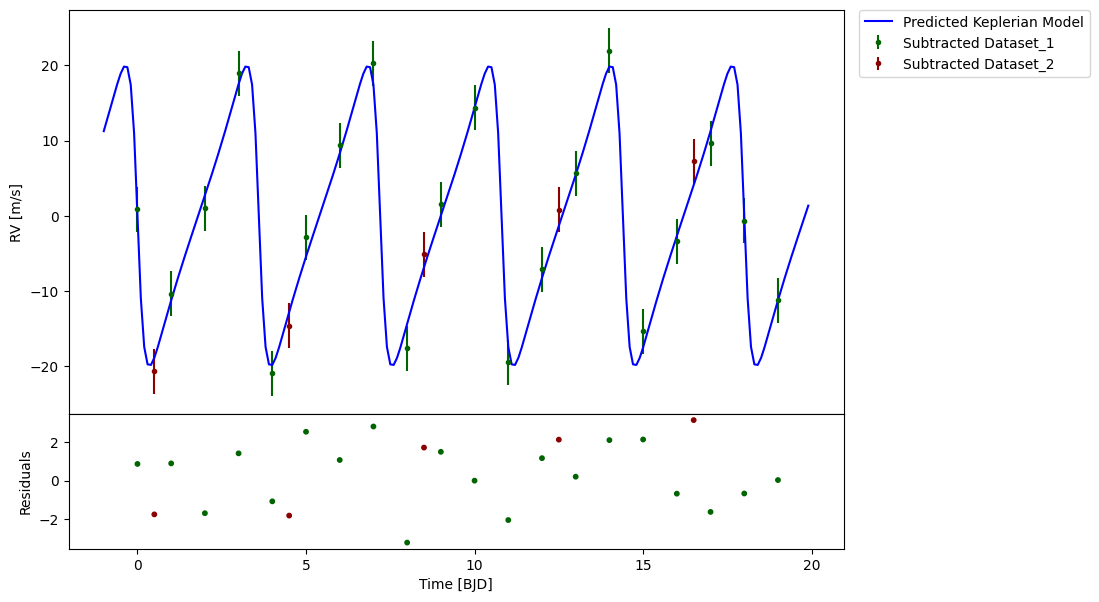

In [18]:
plot.keplerian_only_plot(time, rv, hparam, "Cosine", model_list, model_par, rv_err, flags = flags, keplerian_number = 0, residuals = True)

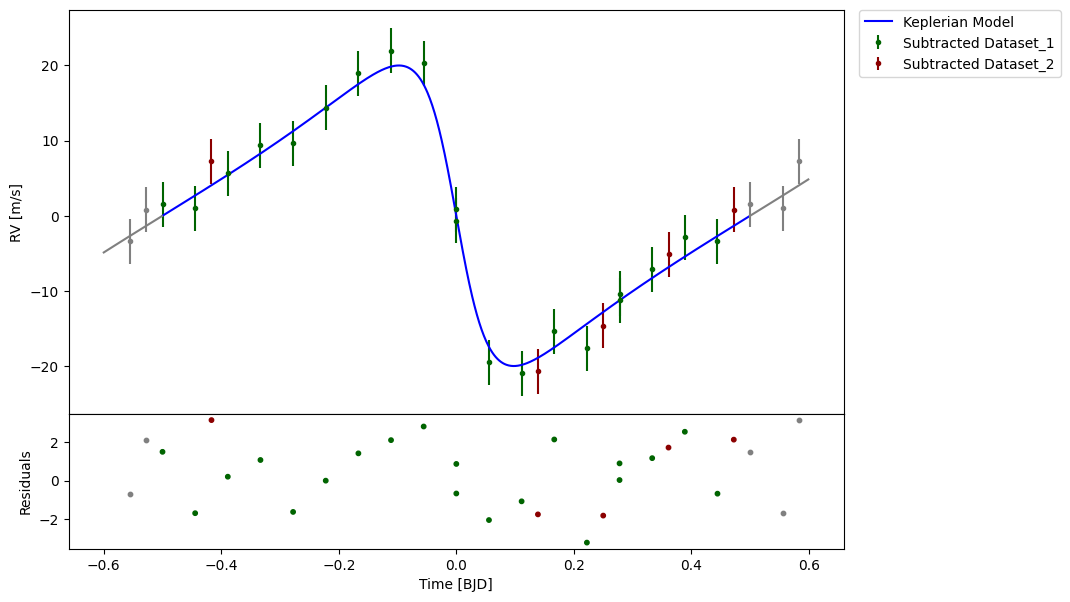

In [19]:
plot.phase_plot(time, rv, hparam, "Cosine", model_list, model_par, rv_err, flags = flags, keplerian_number = 0, residuals = True)

In [20]:
logL_chain, fin_hparams, fin_model_param, completed_iterations, masses = run(iterations, time, rv, rv_err, hparam, "Cosine", model_par, model_list, prior_list, numb_chains=numb_chains, flags = flags, Mstar = 1)

Initial hyper-parameter guesses: 
[10.0, 5.0]

Initial model parameter guesses (ecc and omega are replaced by Sk and Ck): 
[3.6, 20.0, 0.7071067811865476, 4.329780281177467e-17, 0.0, 20.0]

Initial Log Likelihood:  -60.24227958404526

Number of chains:  100

Start Iterations



Progress:  |██████████████████████████████████████████████████| 100.0% Complete


100 iterations have been completed with 100 contemporaneous chains

Acceptance Rate =  0.5764356435643564
 ---- 0.13244706392288208 minutes ----


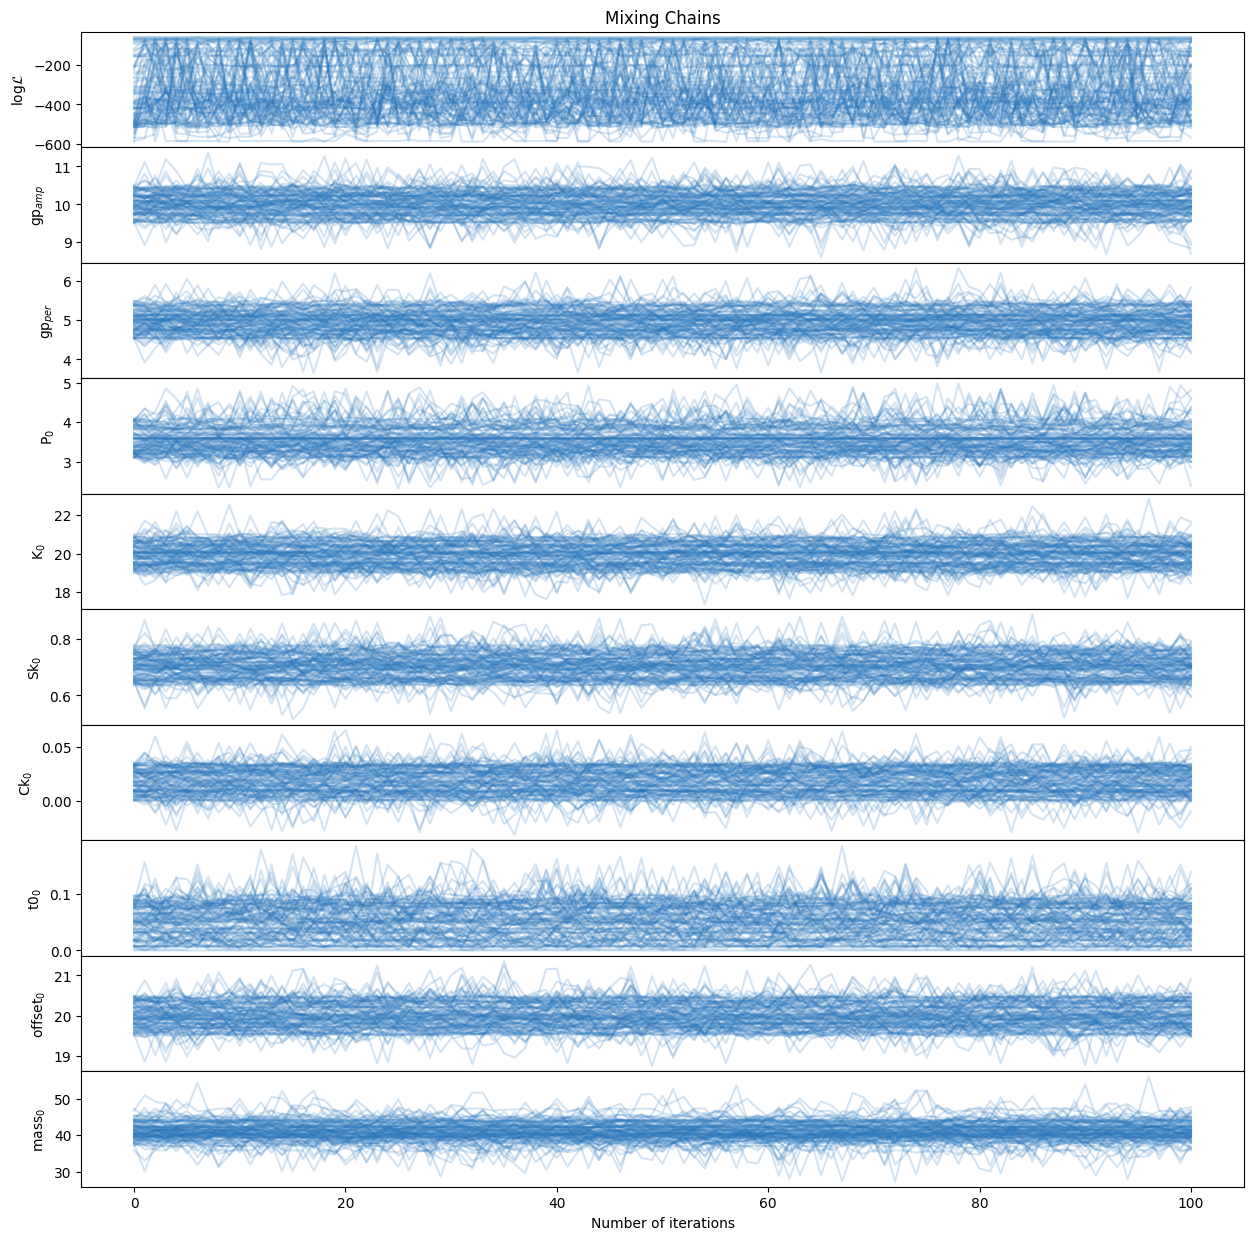

In [21]:
plot.mixing_plot(fin_hparams, "Cosine", fin_model_param, model_list, logL_chain, masses)

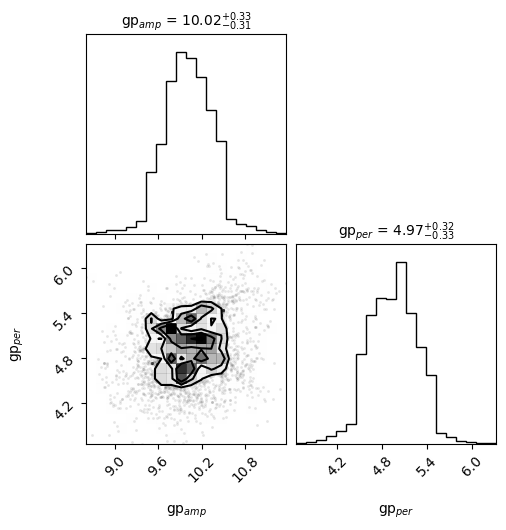

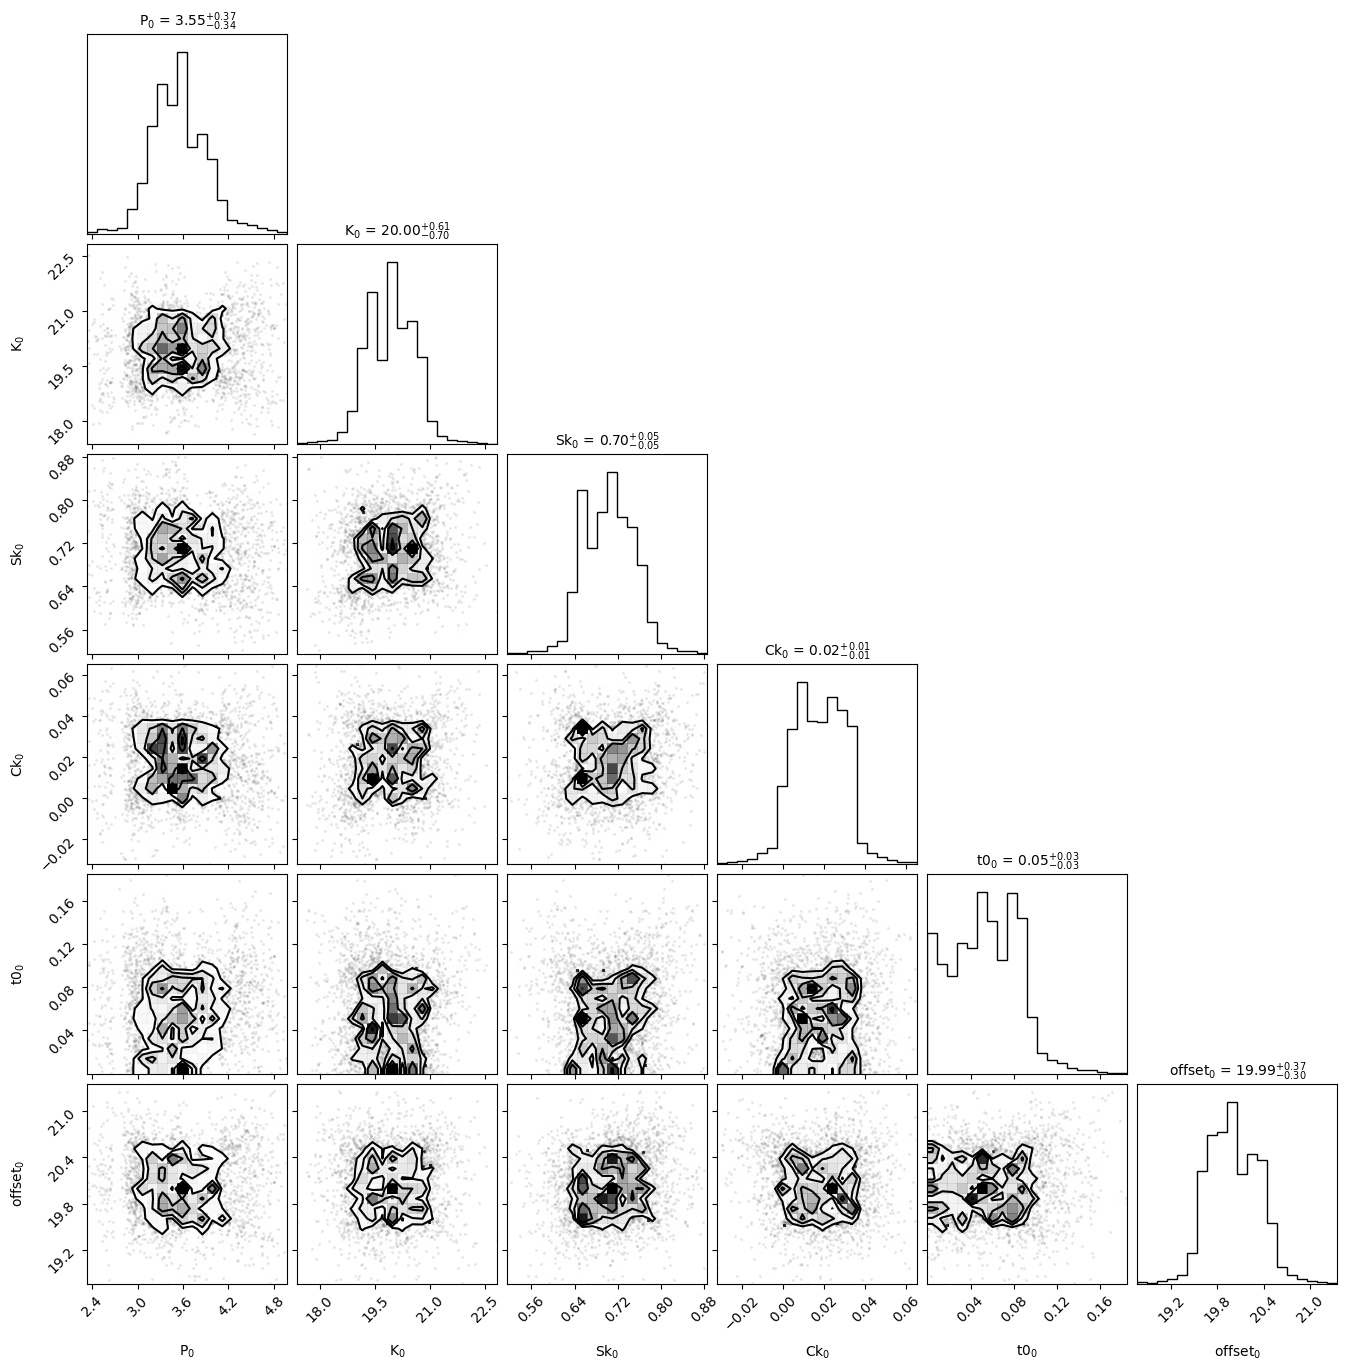

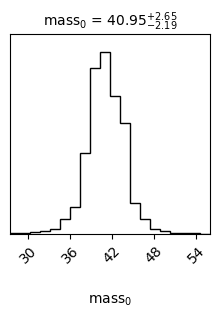

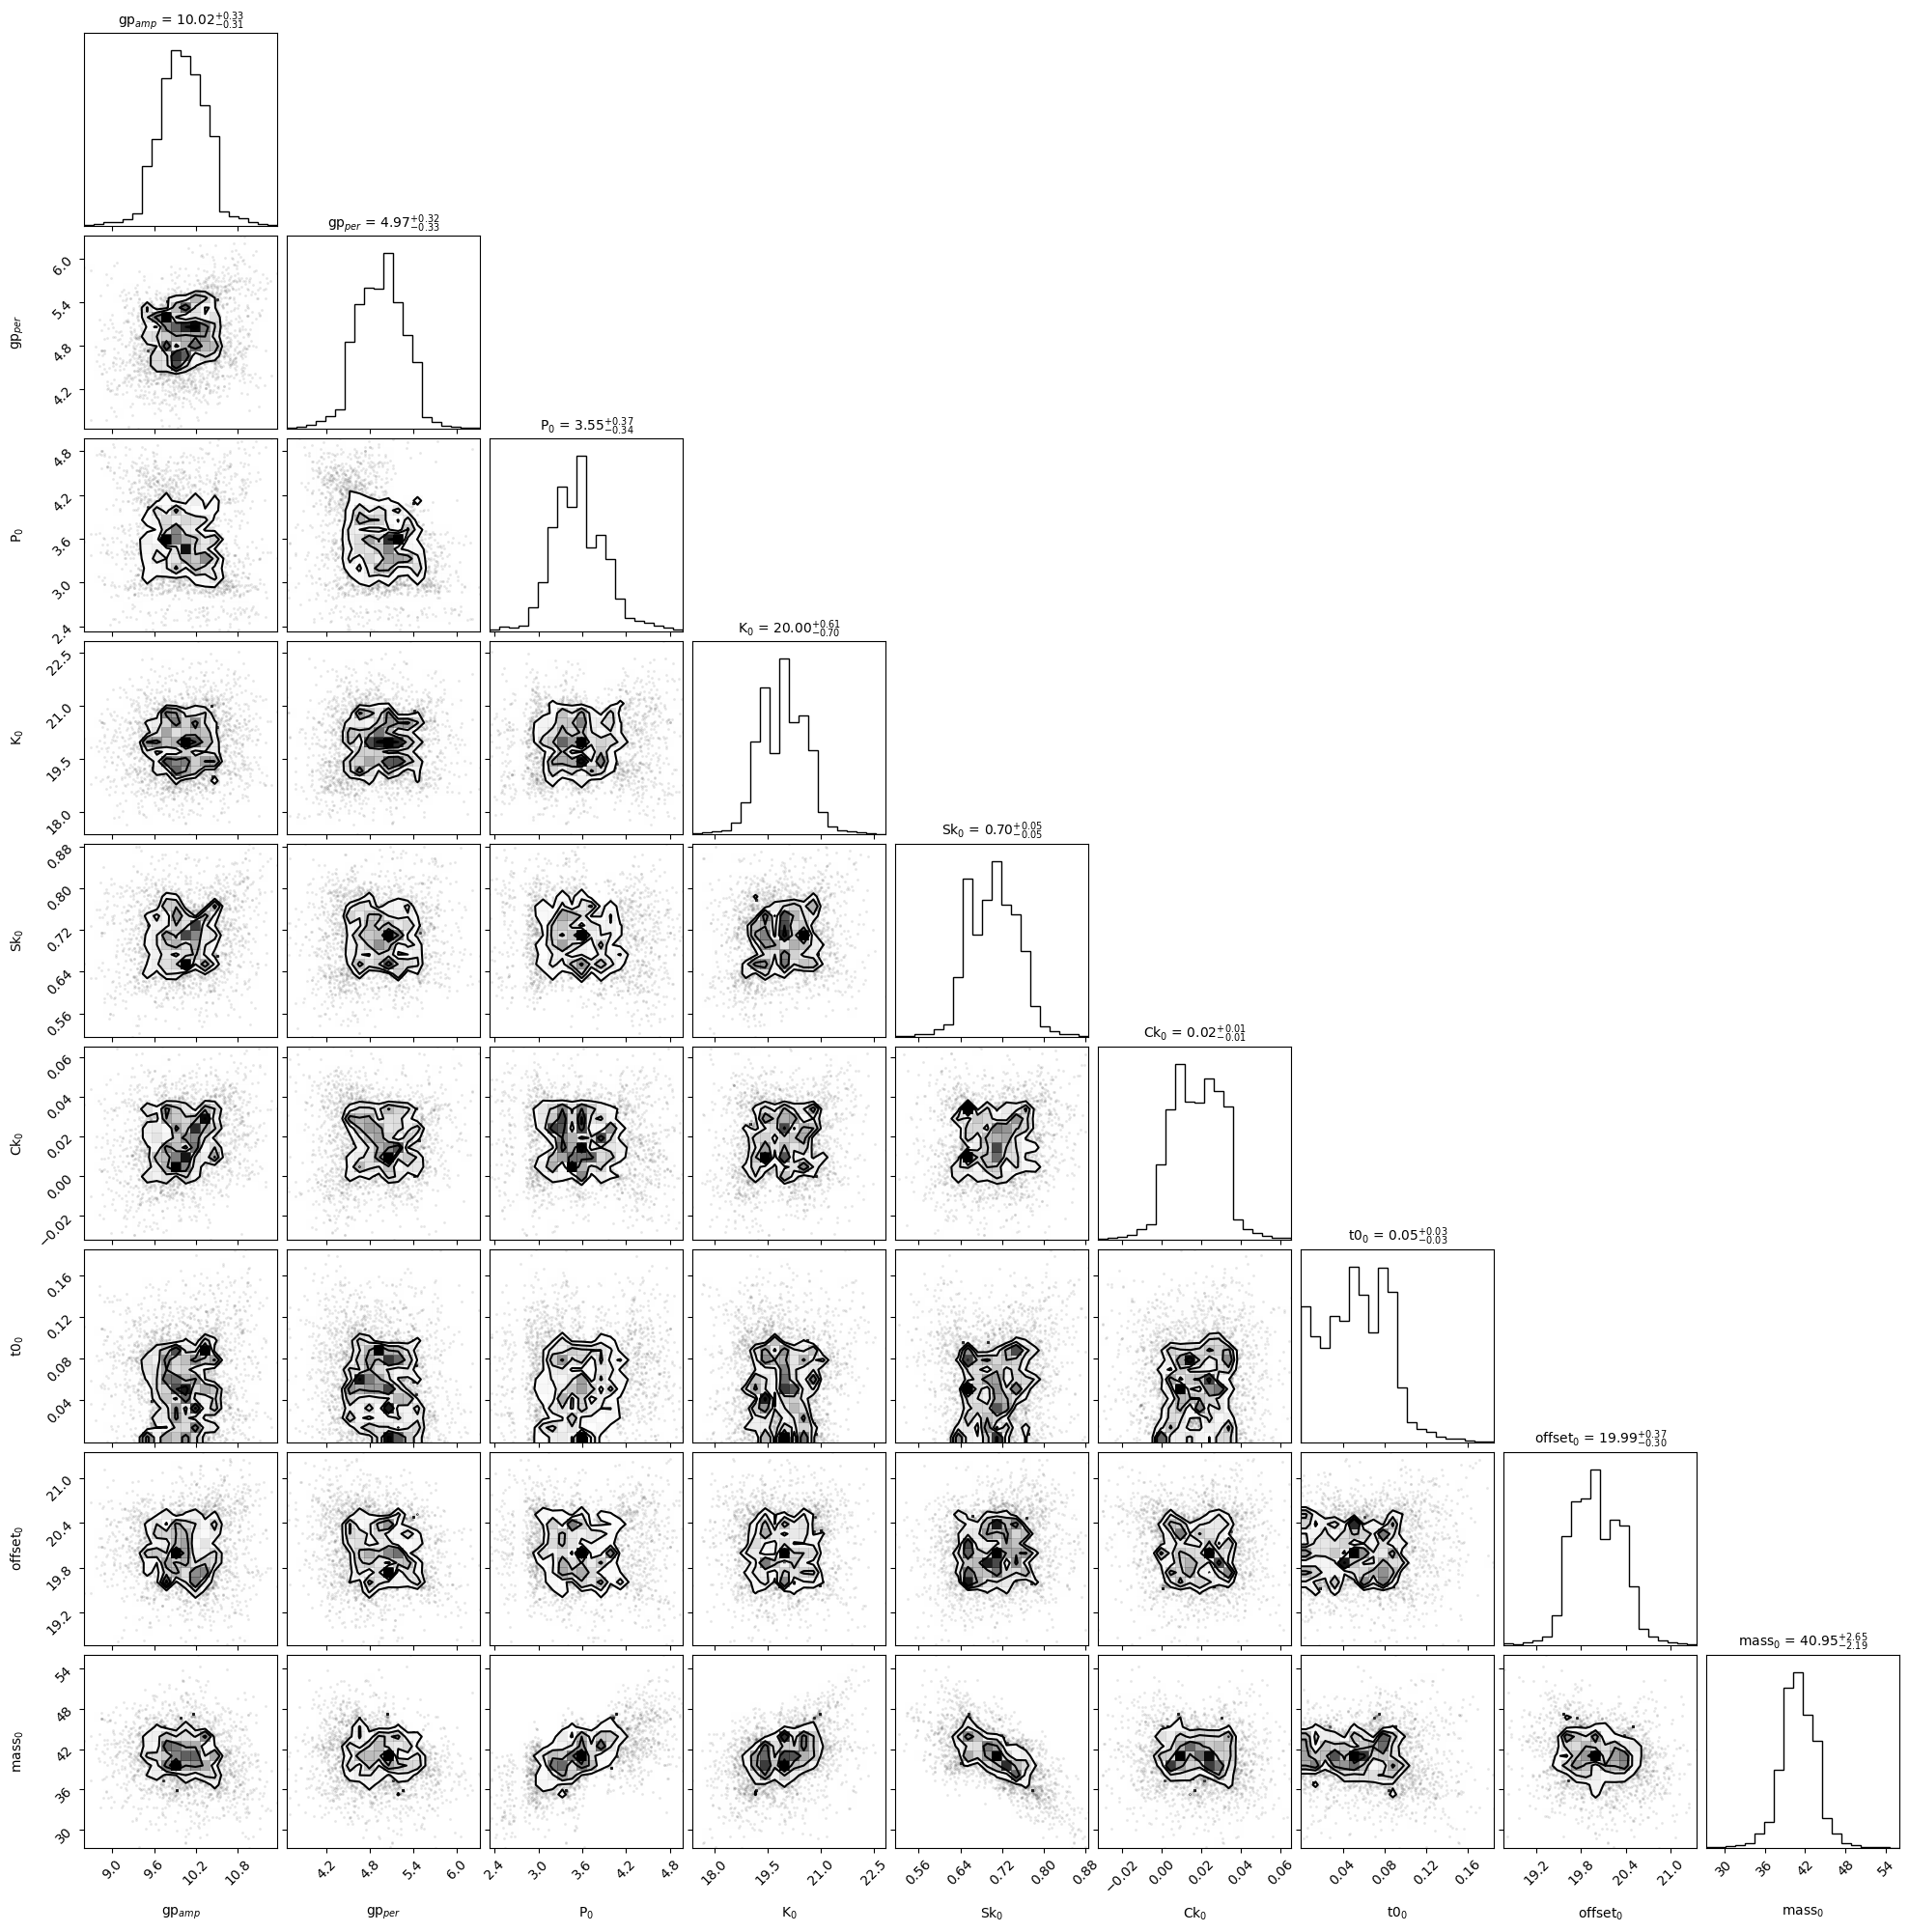

Parameter values after MCMC:  [10.015232671856692, 4.968188315486893, 3.5466719764968397, 19.995697897354077, 0.7041952268391437, 0.017943934542668977, 0.05294307403705051, 19.991120654144122, 40.95359473141447]


In [22]:
final_param_values, final_param_erru, final_param_errd = plot.corner_plot(fin_hparams, "Cosine", fin_model_param, model_list, masses, errors=True)

In [23]:
save('/Users/bdixon/Desktop/MAGPy/Data/test_run/', rv, time, rv_err, model_list = model_list, init_param = model_par, flags = flags, kernel = 'Cosine', init_hparam = hparam, prior_list = prior_list, fin_hparam_post = fin_hparams, fin_param_post = fin_model_param, logl_chain = logL_chain, masses = masses, fin_param_values = final_param_values, fin_param_erru = final_param_erru, fin_param_errd = final_param_errd, burnin = 20, Mstar = 1)